In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [12]:
df = pd.read_csv('/content/bank-full.csv', sep=';')  # Adjust path as needed
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,durations,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
print("Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nTarget Distribution:\n", df['y'].value_counts())


Shape: (45210, 17)

Column Names: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'durations', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
durations    0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Data Types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
durations     int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Target Distribution:
 y
no     39921
yes     5289
Name: count, dtype: int64


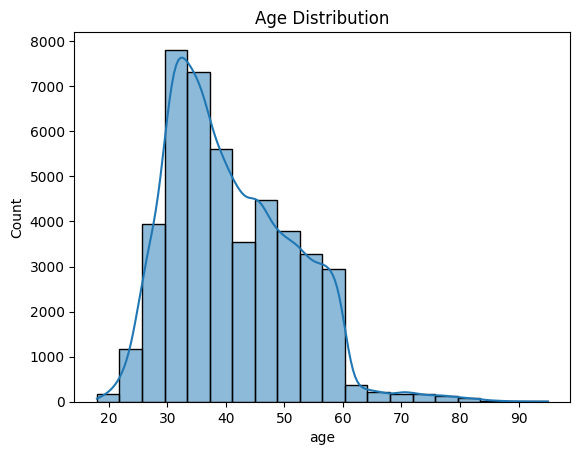

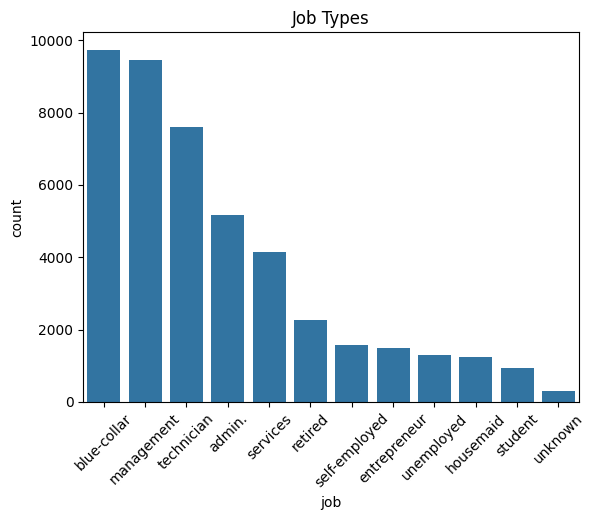

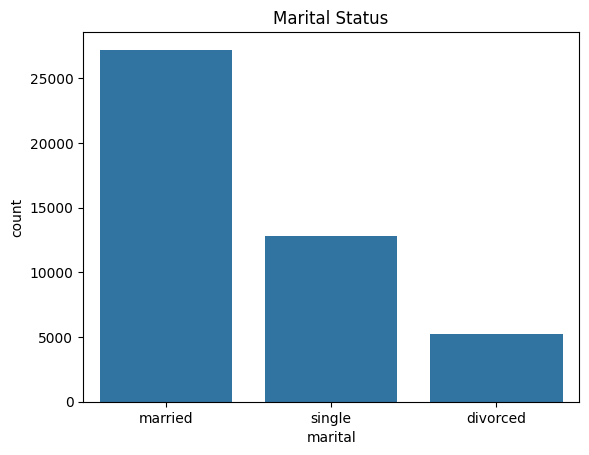

In [14]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title("Job Types")
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='marital')
plt.title("Marital Status")
plt.show()


In [15]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})  # Target variable

le = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [16]:
X = df.drop('y', axis=1)  # Features
y = df['y']               # Target


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Results
Accuracy: 0.8858659588586596
Confusion Matrix:
 [[7782  167]
 [ 865  228]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7949
           1       0.58      0.21      0.31      1093

    accuracy                           0.89      9042
   macro avg       0.74      0.59      0.62      9042
weighted avg       0.86      0.89      0.86      9042



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Results
Accuracy: 0.8710462287104623
Confusion Matrix:
 [[7355  594]
 [ 572  521]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7949
           1       0.47      0.48      0.47      1093

    accuracy                           0.87      9042
   macro avg       0.70      0.70      0.70      9042
weighted avg       0.87      0.87      0.87      9042



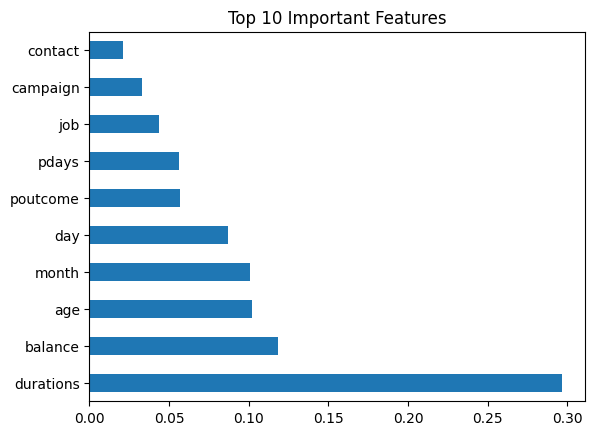

In [20]:
importances = pd.Series(tree_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()
